## Import libraries

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sig_seasontrans import SMSig
import json
# Specify current directory create output directory if it does not exist
os.getcwd()


'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\libs\\SMSig'

In [27]:
def to_datetime(df, time_column, format="%Y-%m-%d %H:%M:%S"):
    df = df.copy()
    df[time_column] = pd.to_datetime(df[time_column], format=format)
    return df.set_index(time_column)

# Test if signatures/parameters fits well for observed data

## Coweeta

In [28]:
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
site = "Coweeta"
test_file = "test_daily_2014_2018_sm_basinavg.csv"

In [29]:
_data = pd.read_csv(os.path.join(home_dir,"data", site, test_file))
_data = to_datetime(_data, "Time")
data = _data["Soil Moisture Content"]

data.head()

Time
2015-08-04    0.153545
2015-08-05    0.151452
2015-08-06    0.164292
2015-08-07    0.164678
2015-08-08    0.159843
Name: Soil Moisture Content, dtype: float64

In [30]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    t=data.index.to_numpy(),
    sm=data.to_numpy(),
    plot_results=True,
    verbose=True
)

In [31]:
seasonal_cycle = pd.read_csv(os.path.join(home_dir,"data", site, "seasonal_cycle.csv"), parse_dates=['valley', 'peak'])
seasonal_cycle

,valley,peak
0,2015-08-09,2015-12-24
1,2016-11-08,2017-04-23
2,2017-08-06,2018-02-11
3,2018-05-07,2019-02-11


In [32]:
# Load the configuration

_parameter_config = os.path.join(home_dir,"data", site, "seasonal_transition_config.json")
with open(_parameter_config, "r") as config_file:
    config = json.load(config_file)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2015:dry2wet
dry2wet Shift=0.22 slope=0.00108 start timing: 14.114205 end timing: 96.861199
Processing 2016:dry2wet
dry2wet Shift=0.00 slope=0.00428 start timing: 30.450585 end timing: 41.549399
Processing 2017:dry2wet
dry2wet Shift=0.21 slope=0.00055 start timing: 72.822556 end timing: 134.528204
Processing 2015:wet2dry
wet2dry Shift=0.41 slope=-0.00078 start timing: 86.777593 end timing: 232.977032
Processing 2016:wet2dry
wet2dry Shift=0.34 slope=-0.00085 start timing: 33.501344 end timing: 70.220087
Processing 2017:wet2dry
wet2dry Shift=0.33 slope=-0.00032 start timing: 17.000574 end timing: 86.999348
[[2457252.61420537 2457349.47540434 2457457.27759263 2457690.25462492]
 [2457700.95058495 2457742.49998437 2457890.00134393 2457960.22143054]
 [2458014.3225561  2458148.85076007 2458167.50057352 2458254.49992152]
 [             nan              nan              nan              nan]]


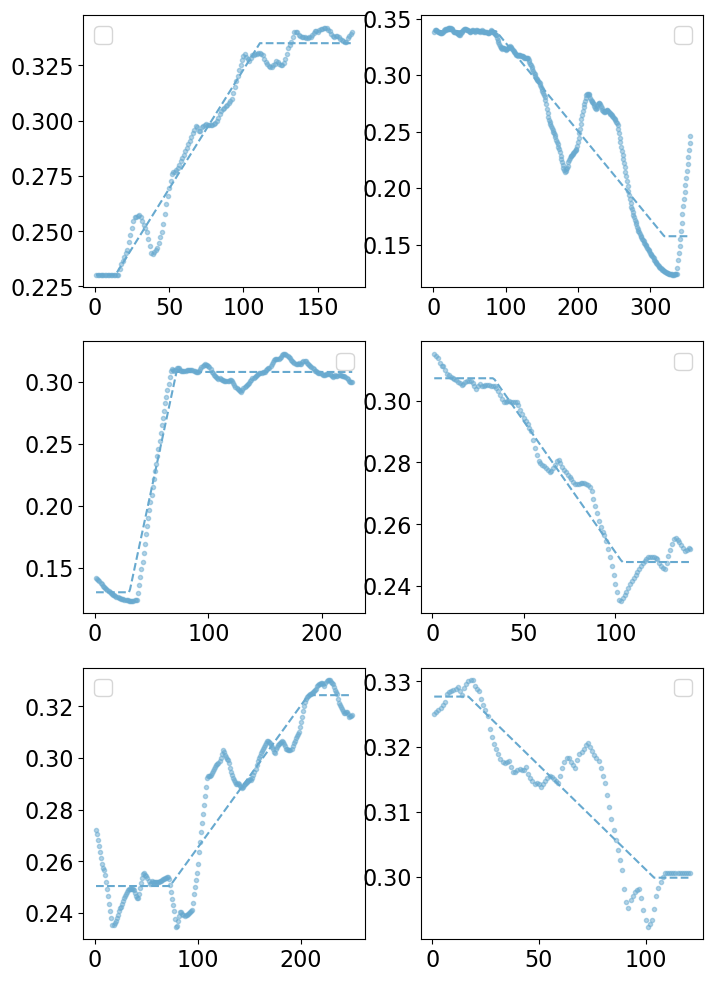

In [33]:
season_trans_obs = sig_obs.calc_seasontrans(seasonal_cycle=seasonal_cycle, parameter_config=config)
print(season_trans_obs)

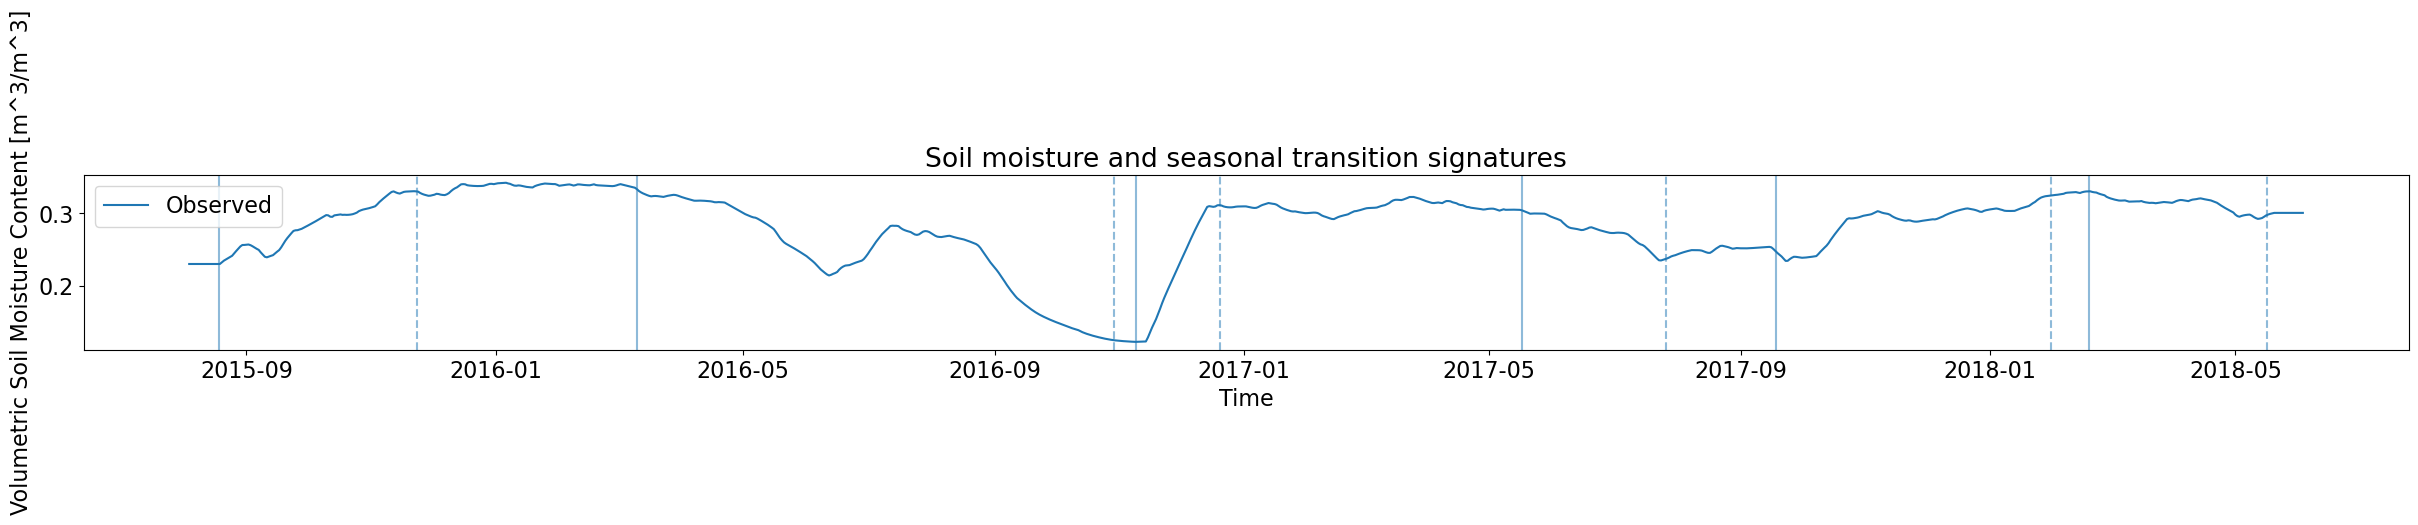

In [34]:
# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
import numpy as np
from datetime import datetime, timedelta
def julian_to_datetime(jd):
    try:
        return datetime(1, 1, 1) + timedelta(days=jd - 1721425)
    except Exception as e:
        # Return np.nan if there's an error
        return np.nan

stard_dates_jd = np.concatenate([season_trans_obs[:, 0], season_trans_obs[:, 2]])
start_dates_obs = [julian_to_datetime(jd) for jd in stard_dates_jd]
end_dates_jd = np.concatenate([season_trans_obs[:, 1], season_trans_obs[:, 3]])
end_dates_obs = [julian_to_datetime(jd) for jd in end_dates_jd]

for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()


## Mahurangi

In [35]:
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
site = "Mahurangi"
test_file = "test_daily_1998_2001_sm_basinavg.csv"

In [36]:
_data = pd.read_csv(os.path.join(home_dir, "data", site, test_file))
_data = to_datetime(_data, "Time", format= r"%Y-%m-%d")
data = _data["Soil Moisture Content"]

data.head()

Time
1998-02-20    0.352933
1998-02-21    0.356116
1998-02-22    0.370902
1998-02-23    0.370510
1998-02-24    0.382052
Name: Soil Moisture Content, dtype: float64

In [37]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    t=data.index.to_numpy(),
    sm=data.to_numpy(),
    plot_results=True,
    verbose=False
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([[2450873.80431558, 2451006.99577653, 2451084.47674889,
        2451200.78830375],
       [2451245.5891135 , 2451361.2590299 , 2451440.6118765 ,
        2451592.09215516],
       [2451642.56503098, 2451705.02518242, 2451798.06997439,
        2451903.2884026 ],
       [             nan,              nan,              nan,
                     nan]])

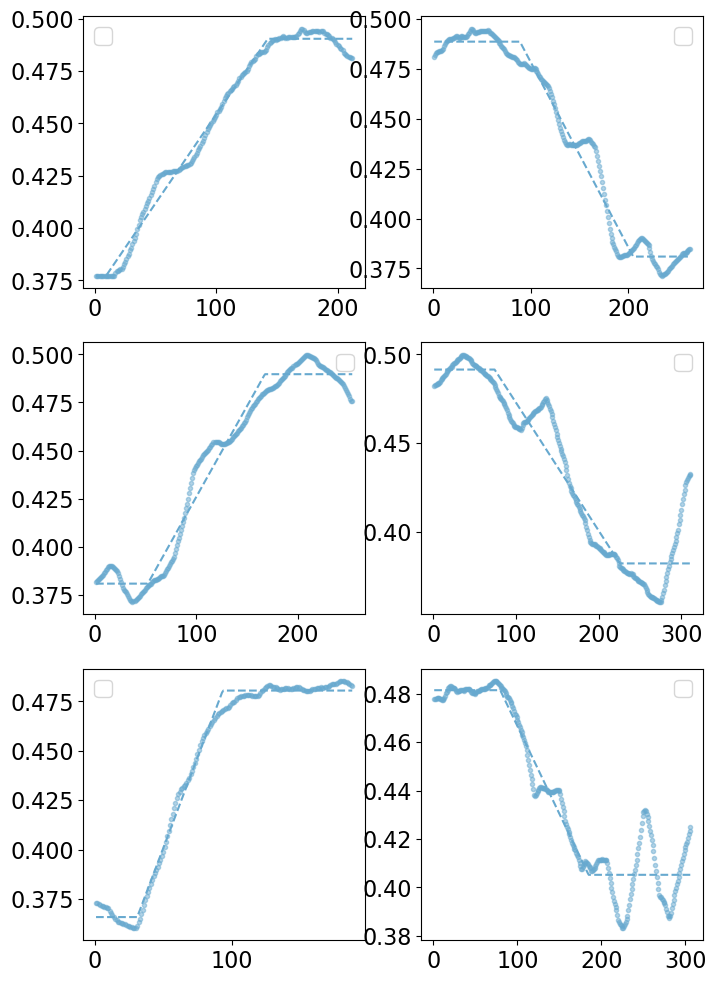

In [38]:
seasonal_cycle = pd.read_csv(os.path.join(home_dir,"data", site, "seasonal_cycle.csv"), parse_dates=['valley', 'peak'])

_parameter_config = os.path.join(home_dir,"data", site, "seasonal_transition_config.json")
with open(_parameter_config, "r") as config_file:
    config = json.load(config_file)

season_trans_obs = sig_obs.calc_seasontrans(seasonal_cycle=seasonal_cycle, parameter_config=config)
season_trans_obs

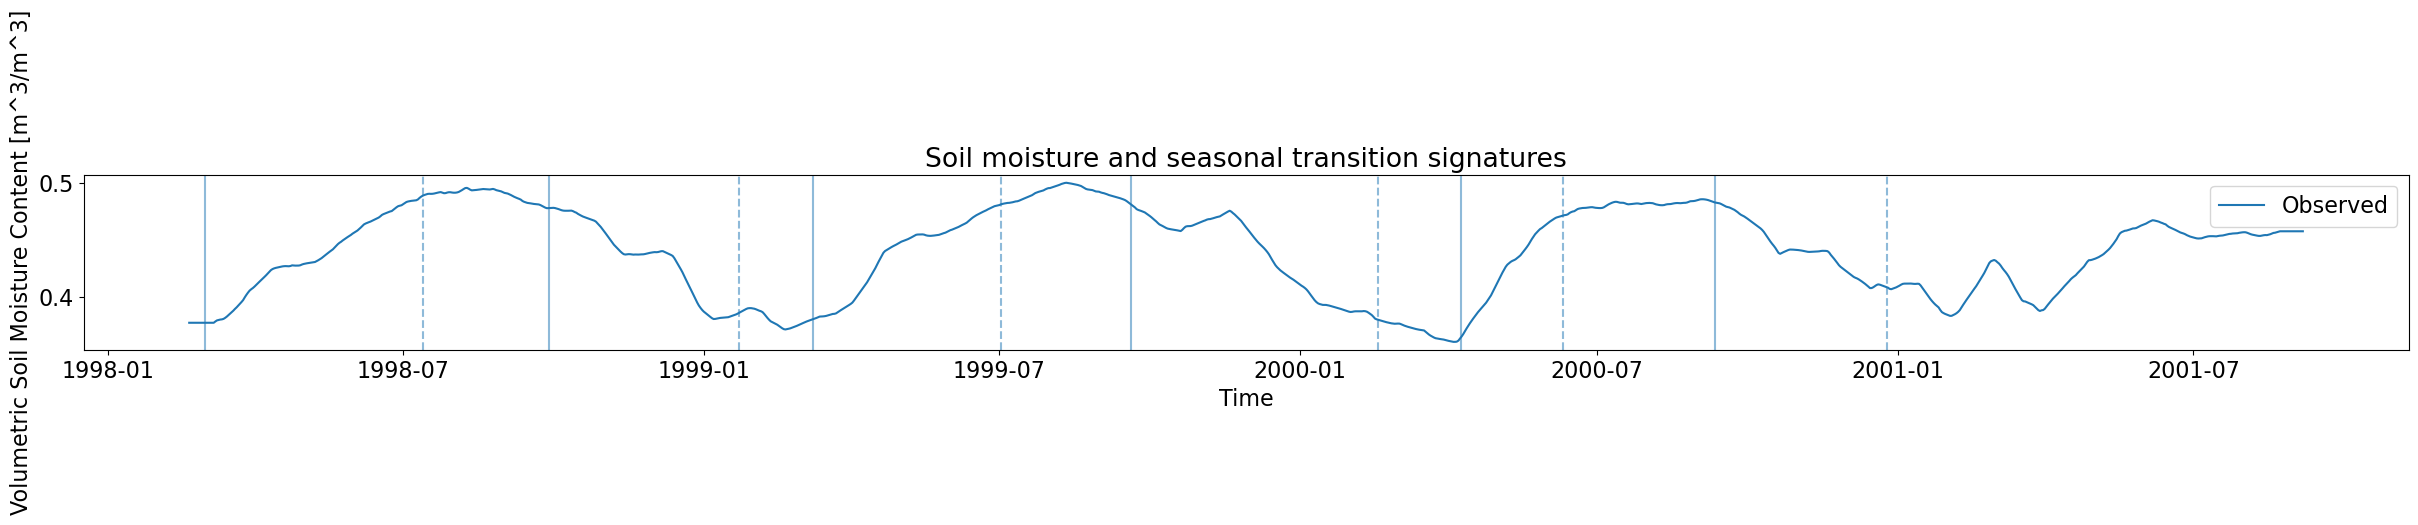

In [39]:
# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
import numpy as np
from datetime import datetime, timedelta
def julian_to_datetime(jd):
    try:
        return datetime(1, 1, 1) + timedelta(days=jd - 1721425)
    except Exception as e:
        # Return np.nan if there's an error
        return np.nan

stard_dates_jd = np.concatenate([season_trans_obs[:, 0], season_trans_obs[:, 2]])
start_dates_obs = [julian_to_datetime(jd) for jd in stard_dates_jd]
end_dates_jd = np.concatenate([season_trans_obs[:, 1], season_trans_obs[:, 3]])
end_dates_obs = [julian_to_datetime(jd) for jd in end_dates_jd]

for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()


In [40]:
start_dates_obs

[datetime.datetime(1998, 3, 1, 19, 18, 12, 865714),
 datetime.datetime(1999, 3, 8, 14, 8, 19, 406599),
 datetime.datetime(2000, 4, 8, 13, 33, 38, 676424),
 nan,
 datetime.datetime(1998, 9, 28, 11, 26, 31, 104238),
 datetime.datetime(1999, 9, 19, 14, 41, 6, 129345),
 datetime.datetime(2000, 9, 11, 1, 40, 45, 787525),
 nan]